- #### [Parte 1] 5. Print do ambiente que está sendo executado  
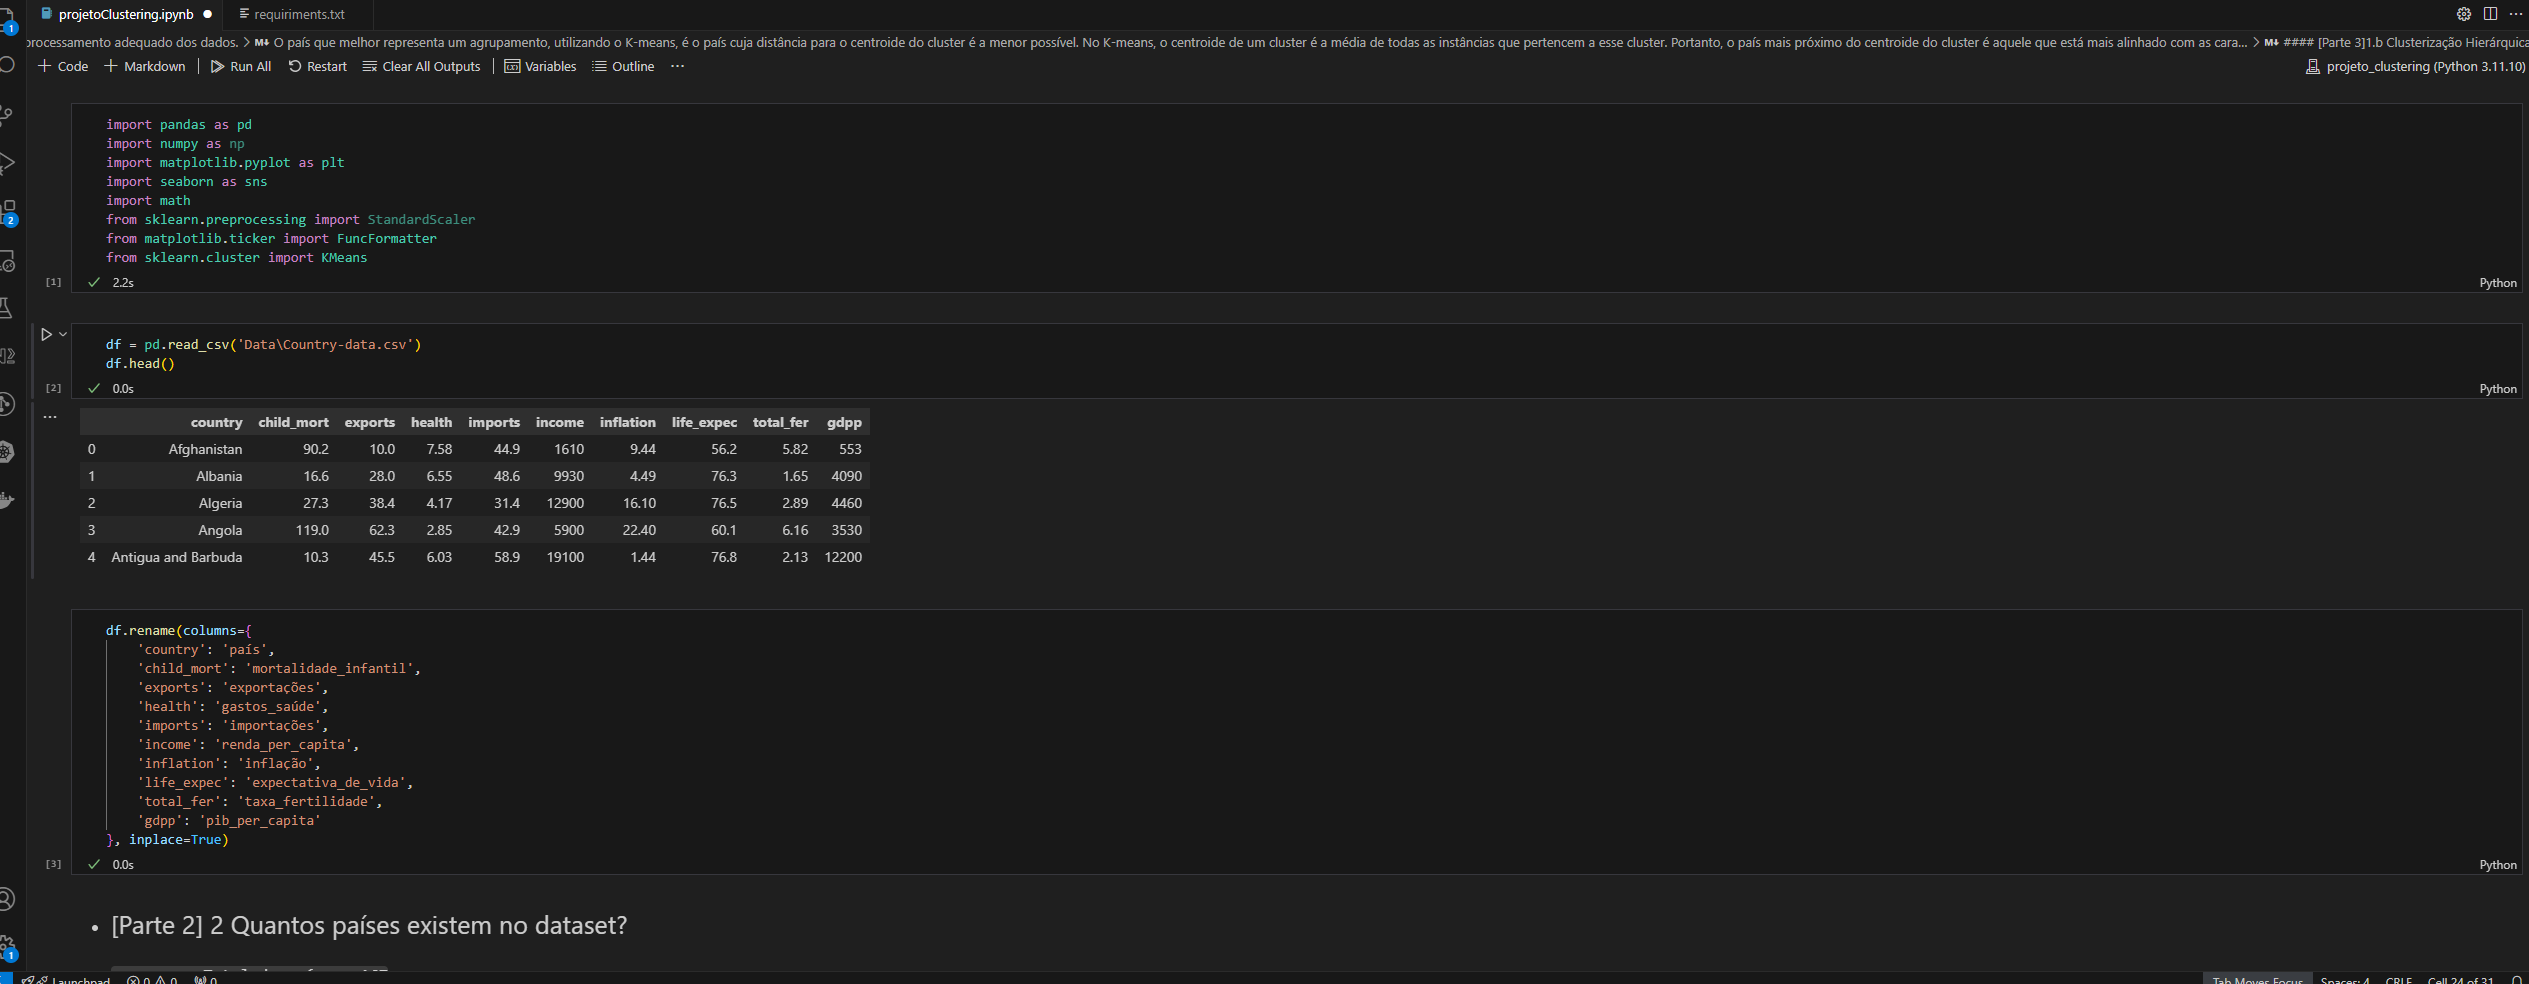

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import FuncFormatter
from sklearn.cluster import KMeans

In [199]:
df = pd.read_csv('Data\Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [200]:
df.rename(columns={
    'country': 'país',
    'child_mort': 'mortalidade_infantil',
    'exports': 'exportações',
    'health': 'gastos_saúde',
    'imports': 'importações',
    'income': 'renda_per_capita',
    'inflation': 'inflação',
    'life_expec': 'expectativa_de_vida',
    'total_fer': 'taxa_fertilidade',
    'gdpp': 'pib_per_capita'
}, inplace=True)

- ### [Parte 2] 2 Quantos países existem no dataset?
                Total de países: 167

In [201]:
len(df['país'].unique())

167

- ### [Parte 2] 3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

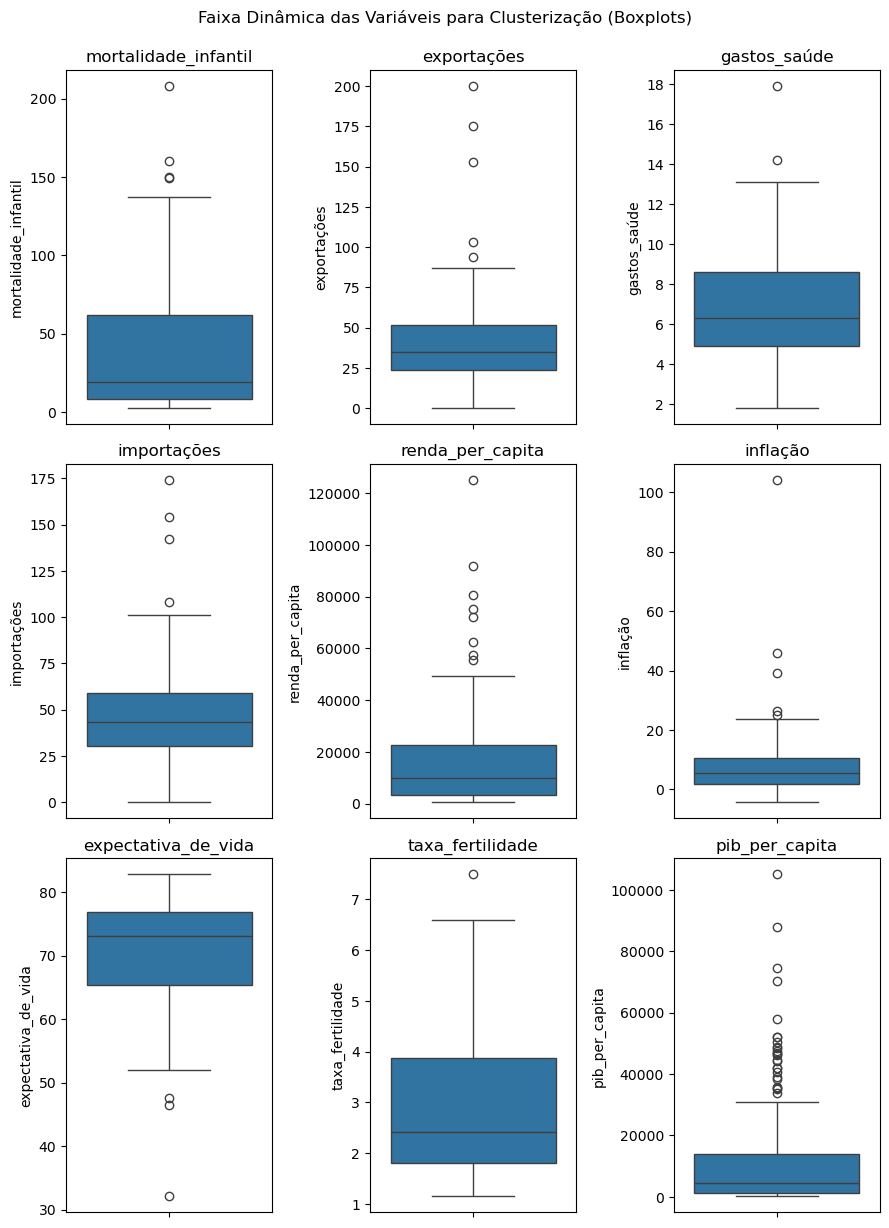

In [202]:
num_vars = len(df.columns[1:])
cols = 3
rows = math.ceil(num_vars / cols)

fig, axes = plt.subplots(rows, cols, figsize=(9, rows * 4))
axes = axes.flatten()

for i, var in enumerate(df.columns[1:]):
    sns.boxplot(data=df[var], ax=axes[i])
    axes[i].set_title(f'{var}')
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Faixa Dinâmica das Variáveis para Clusterização (Boxplots)", y=1.02)
plt.show()

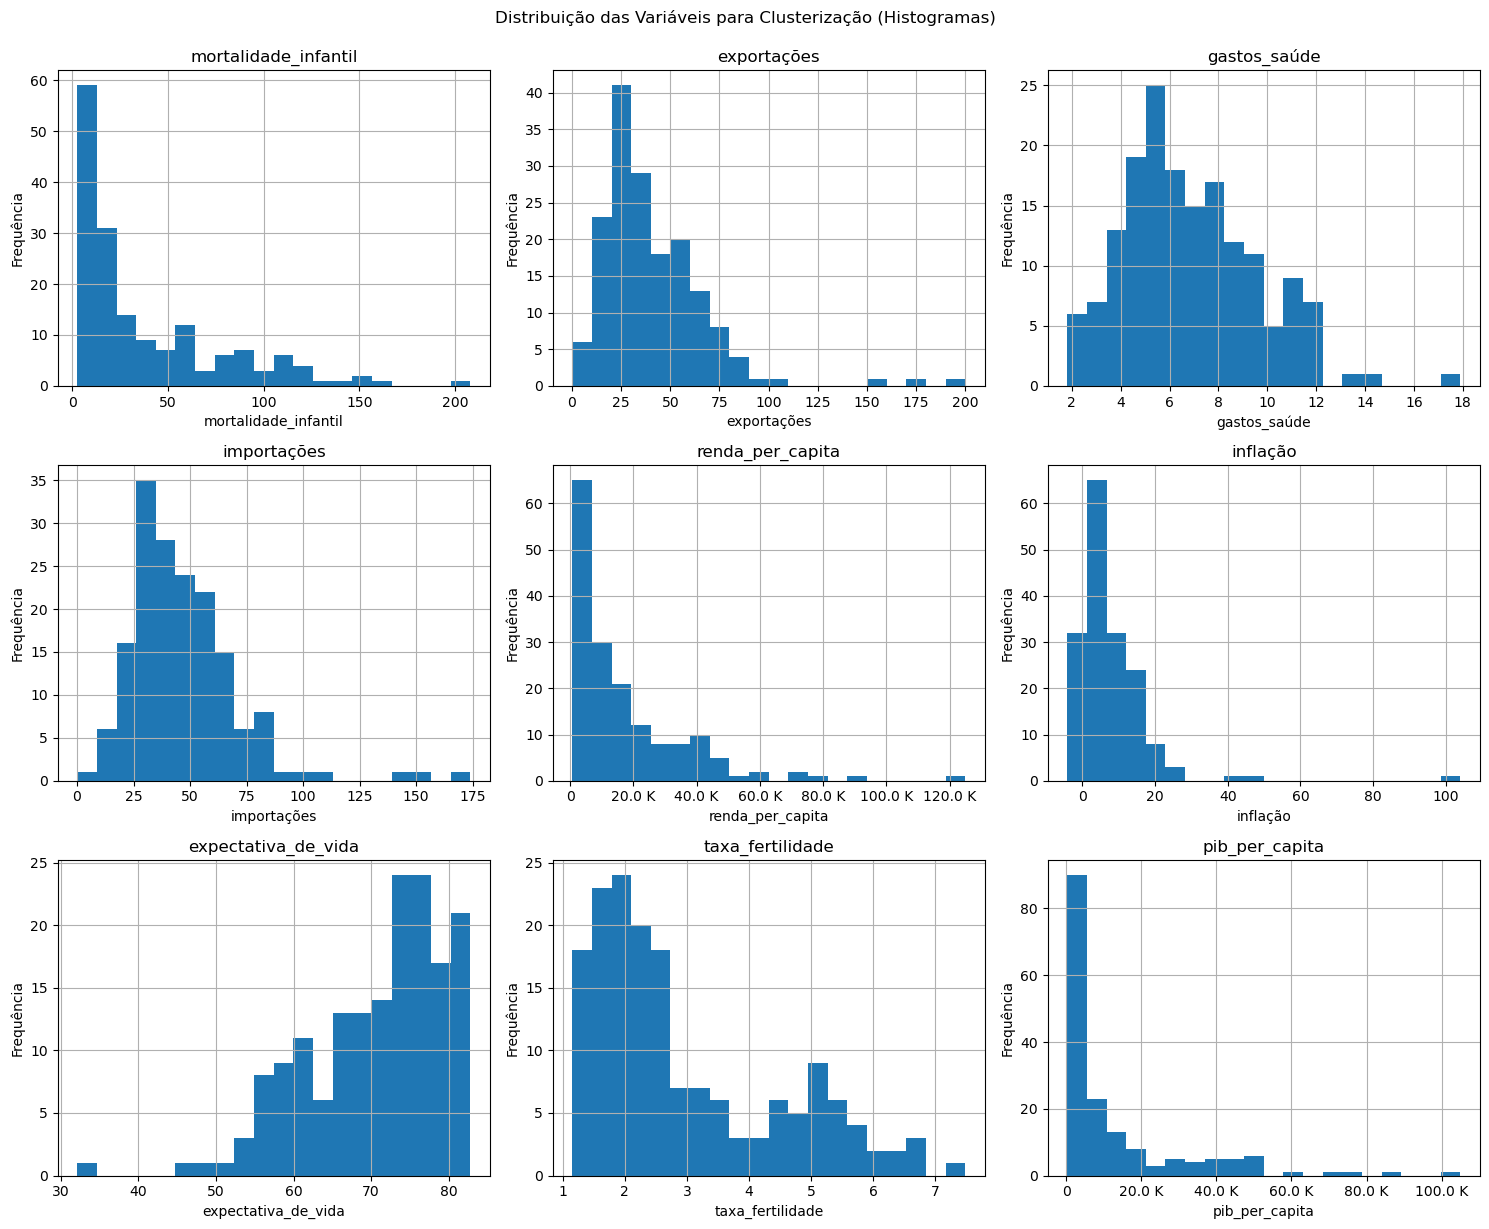

In [203]:
def formatter(x, pos):
    if x >= 1e9:
        return f'{x*1e-9:.1f} B'  # Bilhões
    elif x >= 1e6:
        return f'{x*1e-6:.1f} M'  # Milhões
    elif x >= 1e3:
        return f'{x*1e-3:.1f} K'  # Milhares
    else:
        return f'{int(x)}'  # Números pequenos

num_vars = len(df.columns[1:])
cols = 3
rows = math.ceil(num_vars / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, var in enumerate(df.columns[1:]):
    df[var].hist(bins=20, ax=axes[i])
    axes[i].set_title(f'{var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequência')
    axes[i].xaxis.set_major_formatter(FuncFormatter(formatter))

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Distribuição das Variáveis para Clusterização (Histogramas)", y=1.02)
plt.show()

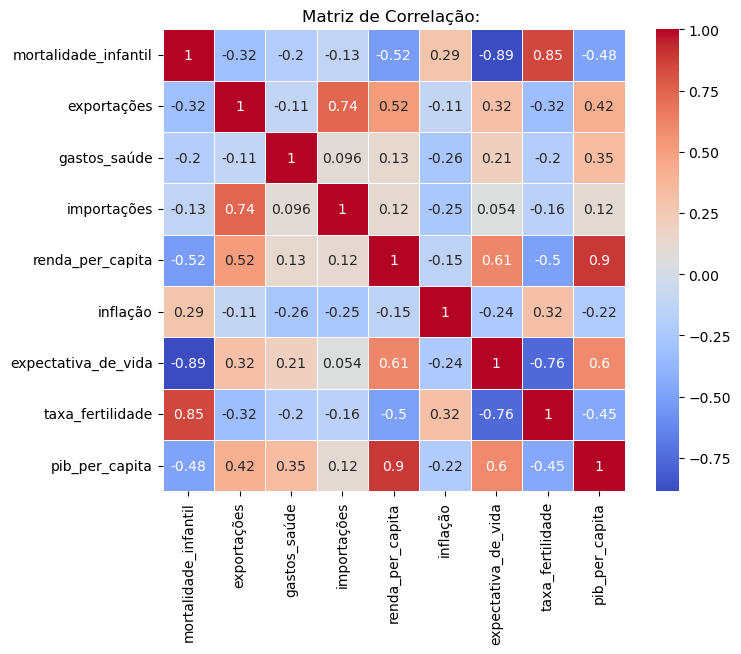

In [204]:
data = df.drop(columns=['país'])
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Matriz de Correlação: ")
plt.show()

In [205]:
valores_nulos = df.isnull().sum()

print("Valores nulos por coluna:")
print(valores_nulos[valores_nulos > 0])

if df.isnull().values.any():
    print("\nO DataFrame possui valores nulos.")
else:
    print("\nO DataFrame não possui valores nulos.")


Valores nulos por coluna:
Series([], dtype: int64)

O DataFrame não possui valores nulos.


In [206]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dados_normalizados = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
df_normalizado = dados_normalizados.copy()

#### [Parte 2] 4. Realize o pré-processamento adequado dos dados.

Como pode ser observado nas células de código acima não houve necessidade de tratamento para valores ausentes.  
Só foi aplicado a normalização dos valores (escalonar os dados para que todas as variáveis fiquem dentro de uma mesma faixa, como de 0 a 1.)

In [207]:
df_normalizado['país'] = df['país']

- #### [Parte 3] 1. Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:
- ##### K-Médias
- ##### Clusterização Hierárquica

In [208]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dados_normalizados)

dados_normalizados['Cluster_KMeans'] = kmeans.labels_
dados_normalizados['país'] = df['país']

print(dados_normalizados[['país', 'Cluster_KMeans']].head())

                  país  Cluster_KMeans
0          Afghanistan               0
1              Albania               1
2              Algeria               1
3               Angola               0
4  Antigua and Barbuda               1


c:\Users\LICIE\anaconda3\envs\projeto_clustering\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LICIE\anaconda3\envs\projeto_clustering\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [209]:
dados_normalizados = dados_normalizados.drop(columns=['país'])

- #### [Parte 3] 2. Para os resultados, do K-Médias:
- ##### a. Interprete cada um dos clusters obtidos citando:  
- ##### a.i Qual a distribuição das dimensões em cada grupo

In [210]:
distribuicao_kmeans = dados_normalizados.groupby('Cluster_KMeans').mean()
print("Distribuição das dimensões por cluster:")
distribuicao_kmeans

Distribuição das dimensões por cluster:


,mortalidade_infantil,exportações,gastos_saúde,importações,renda_per_capita,inflação,expectativa_de_vida,taxa_fertilidade,pib_per_capita
Cluster_KMeans,,,,,,,,,
0,0.441503,0.145970,0.281447,0.248553,0.023376,0.150698,0.538333,0.621485,0.013982
1,0.095659,0.203542,0.275648,0.271488,0.098919,0.108466,0.799134,0.178759,0.063018
2,0.010883,0.289142,0.441962,0.291314,0.368192,0.062890,0.952373,0.094684,0.416784


##### Interpretação
Cluster 0: Representa países em transição, com níveis moderados de desenvolvimento econômico e social. Expectativa de vida alta, mas PIB per capita e renda ainda baixos.  
Cluster 1: Representa países desenvolvidos, com alta renda, baixa mortalidade infantil, alta expectativa de vida, e forte integração ao comércio internacional. Esses países, provavelmente, possuem economias estáveis e sistemas de saúde robustos.  
Cluster 2: Representa países menos desenvolvidos, com alta mortalidade infantil, baixa renda, e expectativa de vida baixa. Esses países, provavelmente, enfrentam desafios econômicos e sociais significativos.  

- #### [Parte 3] 2.a.ii O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique

Países representativos por cluster:  
Cluster 0: Suriname  
Cluster 1: Iceland  
Cluster 2: Guinea  

O país que melhor representa um agrupamento, utilizando o K-means, é o país cuja distância para o centroide do cluster é a menor possível.  
No K-means, o centroide de um cluster é a média de todas as instâncias que pertencem a esse cluster.  
Portanto, o país mais próximo do centroide do cluster é aquele que está mais alinhado com as características médias de todos os países dentro desse cluster.

In [211]:
from scipy.spatial.distance import cdist

df_num = df_normalizado.drop(columns=['país'])
distancias = cdist(df_num, kmeans.cluster_centers_, 'euclidean')

pais_representativo = []
for i in range(3):
    indice_pais = distancias[:, i].argmin()
    pais_representativo.append(df_normalizado.iloc[indice_pais]['país'])

print("Países representativos por cluster:")
for i, pais in enumerate(pais_representativo):
    print(f"Cluster {i}: {pais}")

Países representativos por cluster:
Cluster 0: Guinea
Cluster 1: Suriname
Cluster 2: Iceland


- #### [Parte 3]1.b Clusterização Hierárquica

In [212]:
df_normalizado['Cluster_KMeans'] = dados_normalizados['Cluster_KMeans'].copy()
dados_normalizados = dados_normalizados.drop(columns=['Cluster_KMeans'])
df_normalizado

,mortalidade_infantil,exportações,gastos_saúde,importações,renda_per_capita,inflação,expectativa_de_vida,taxa_fertilidade,pib_per_capita,país,Cluster_KMeans
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,Afghanistan,0
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,Albania,1
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,Algeria,1
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,Angola,0
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,Antigua and Barbuda,1
...,...,...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143,Vanuatu,1
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650,Venezuela,1
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299,Vietnam,1
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299,Yemen,0


In [213]:
dados_normalizados

,mortalidade_infantil,exportações,gastos_saúde,importações,renda_per_capita,inflação,expectativa_de_vida,taxa_fertilidade,pib_per_capita
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


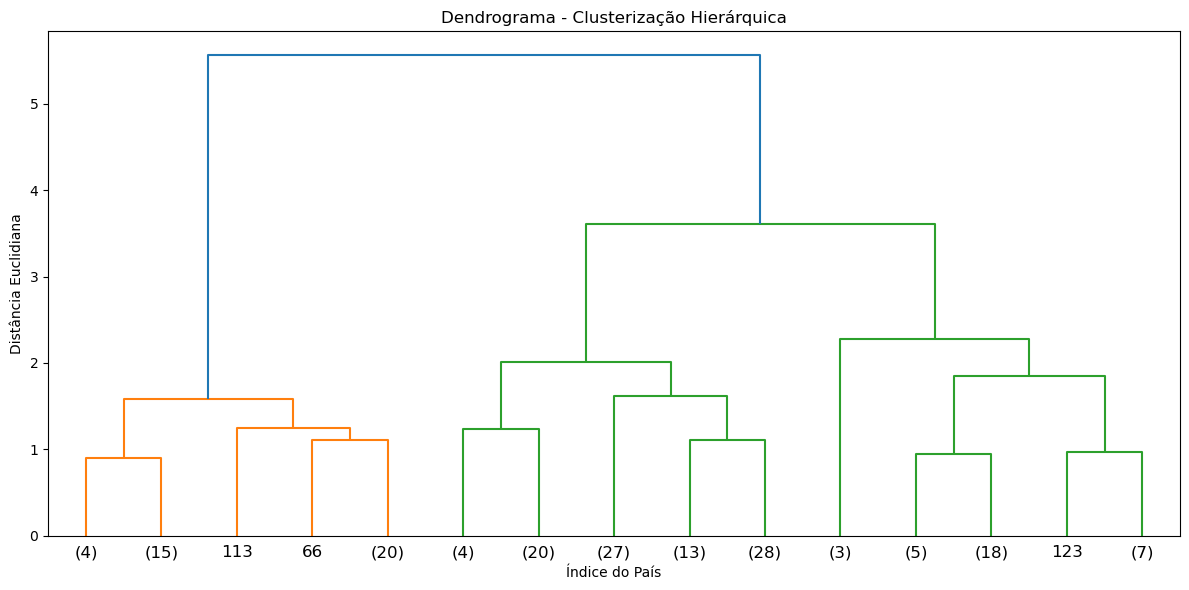

In [214]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage_matrix = linkage(dados_normalizados, method='ward')

# Plotando o dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix,  truncate_mode='lastp', p=15)
plt.title("Dendrograma - Clusterização Hierárquica")
plt.xlabel("Índice do País")
plt.ylabel("Distância Euclidiana")
plt.tight_layout()
plt.show()

In [215]:
df_normalizado['Cluster_Hierarquico'] = fcluster(linkage_matrix, t=3, criterion='maxclust')

print(df_normalizado[['país', 'Cluster_Hierarquico']].head())

                  país  Cluster_Hierarquico
0          Afghanistan                    1
1              Albania                    2
2              Algeria                    2
3               Angola                    1
4  Antigua and Barbuda                    2


In [216]:
df_normalizado['Cluster_KMeans_Ajustado'] = df_normalizado['Cluster_KMeans'] + 1

In [ ]:
kmeans_clusters = df_normalizado.groupby('Cluster_KMeans_Ajustado')['país'].apply(list).to_dict()
hcluster_clusters = df_normalizado.groupby('Cluster_Hierarquico')['país'].apply(list).to_dict()

comparacao_clusters = {}
for kmeans_cluster, kmeans_paises in kmeans_clusters.items():
    comparacao_clusters[kmeans_cluster] = {}
    for hcluster_cluster, hcluster_paises in hcluster_clusters.items():
        paises_comuns = set(kmeans_paises).intersection(hcluster_paises)
        paises_kmeans_unicos = set(kmeans_paises).difference(hcluster_paises)
        paises_hcluster_unicos = set(hcluster_paises).difference(kmeans_paises)
        
        comparacao_clusters[kmeans_cluster][hcluster_cluster] = {
            "Paises_Comuns": paises_comuns,
            "Paises_Unicos_KMeans": paises_kmeans_unicos,
            "Paises_Unicos_HCluster": paises_hcluster_unicos
        }

for kmeans_cluster in comparacao_clusters:
    for hcluster_cluster in comparacao_clusters[kmeans_cluster]:
        paises_comuns = comparacao_clusters[kmeans_cluster][hcluster_cluster]['Paises_Comuns']
        print(f"Cluster KMeans {kmeans_cluster} e Cluster HCluster {hcluster_cluster}: {len(paises_comuns)} países comuns")

Cluster KMeans 1 e Cluster HCluster 1: 39 países comuns
Cluster KMeans 1 e Cluster HCluster 2: 7 países comuns
Cluster KMeans 1 e Cluster HCluster 3: 0 países comuns
Cluster KMeans 2 e Cluster HCluster 1: 2 países comuns
Cluster KMeans 2 e Cluster HCluster 2: 81 países comuns
Cluster KMeans 2 e Cluster HCluster 3: 4 países comuns
Cluster KMeans 3 e Cluster HCluster 1: 0 países comuns
Cluster KMeans 3 e Cluster HCluster 2: 4 países comuns
Cluster KMeans 3 e Cluster HCluster 3: 30 países comuns


In [235]:
for kmeans_cluster in comparacao_clusters:
    for hcluster_cluster in comparacao_clusters[kmeans_cluster]:
        paises_comuns = comparacao_clusters[kmeans_cluster][hcluster_cluster]['Paises_Comuns']
        paises_unicos_kmeans = comparacao_clusters[kmeans_cluster][hcluster_cluster]['Paises_Unicos_KMeans']
        paises_unicos_hcluster = comparacao_clusters[kmeans_cluster][hcluster_cluster]['Paises_Unicos_HCluster']
        
        print(f"Cluster KMeans {kmeans_cluster} e Cluster HCluster {hcluster_cluster}:")
        print(f"  - Países Comuns: {len(paises_comuns)}")
        print(f"  - Países Únicos no KMeans: {len(paises_unicos_kmeans)}")
        print(f"  - Países Únicos no HCluster: {len(paises_unicos_hcluster)}")
        print()

Cluster KMeans 1 e Cluster HCluster 1:
  - Países Comuns: 39
  - Países Únicos no KMeans: 7
  - Países Únicos no HCluster: 2

Cluster KMeans 1 e Cluster HCluster 2:
  - Países Comuns: 7
  - Países Únicos no KMeans: 39
  - Países Únicos no HCluster: 85

Cluster KMeans 1 e Cluster HCluster 3:
  - Países Comuns: 0
  - Países Únicos no KMeans: 46
  - Países Únicos no HCluster: 34

Cluster KMeans 2 e Cluster HCluster 1:
  - Países Comuns: 2
  - Países Únicos no KMeans: 85
  - Países Únicos no HCluster: 39

Cluster KMeans 2 e Cluster HCluster 2:
  - Países Comuns: 81
  - Países Únicos no KMeans: 6
  - Países Únicos no HCluster: 11

Cluster KMeans 2 e Cluster HCluster 3:
  - Países Comuns: 4
  - Países Únicos no KMeans: 83
  - Países Únicos no HCluster: 30

Cluster KMeans 3 e Cluster HCluster 1:
  - Países Comuns: 0
  - Países Únicos no KMeans: 34
  - Países Únicos no HCluster: 41

Cluster KMeans 3 e Cluster HCluster 2:
  - Países Comuns: 4
  - Países Únicos no KMeans: 30
  - Países Únicos no

- #### [Parte 3] 4. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.
  - A forma de agrupamento diferente pois no hcluster há diferentes niveis de agrupamento. Acima foi realizado a comparação de países em cada cluster levando em conta essa divergência. E para o problema específico há uma boa similaridade. Após fazer uma análise detalhada (linha a linha) foi verificado o seguinte resultado:
- Cluster 1 (K-Means):  

  - 39 países são atribuídos ao mesmo cluster 1 em ambos os métodos, indicando boa similaridade.  
  - 7 países são atribuídos ao cluster 2 no HCluster, mostrando alguma discordância.  

- Cluster 2 (K-Means):  

  - 81 países são classificados no cluster 2 em ambos os métodos, representando uma alta correspondência.  
  - 2 países aparecem no cluster 1 no HCluster, o que sugere leve discordância.  
  - 4 países estão no cluster 3 no HCluster, evidenciando mais dispersão aqui.  

- Cluster 3 (K-Means):  

  - 30 países são consistentemente classificados no cluster 3 pelos dois métodos.  
  - 4 países aparecem no cluster 2 no HCluster, mostrando divergências nesse agrupamento.  

- #### [Parte 4] 1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.

##### Etapas do Algoritmo de K-médias até sua Convergência:
Inicialização dos Centrós:
O algoritmo começa com a escolha inicial de K centróides (ou seja, o número de clusters que se deseja encontrar) que é um hiper paramêtro que a ser definido.

Atribuição de Pontos aos Centrós:
Para cada ponto no conjunto de dados, o algoritmo calcula a distância (geralmente a distância euclidiana, mas há outras, a utilização depende do caso) até cada um dos K centróides.
O ponto é atribuído ao cluster cujo centróide está mais próximo.

Atualização dos Centrós:
Após a atribuição dos pontos aos clusters, os centróides são recalculados. O novo centróide de cada cluster é a média das posições de todos os pontos atribuídos a ele.

Repetição dos Passos 2 e 3:
Atribuição e atualização de centróides são repetidos até que o algoritmo atinja a convergência, ou seja, até que os centróides não mudem mais significativamente de uma iteração para outra, deslocamento mínimo ou nulo entre as interações.

Critério de Convergência: O algoritmo converge quando o deslocamento dos centróides entre iterações é inferior a um valor limiar predefinido (ou seja, não há mudanças significativas) ou quando um número máximo de iterações é alcançado.

- #### [Parte 4] 2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.  Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

In [220]:
from sklearn_extra.cluster import KMedoids

In [221]:
scaler = MinMaxScaler()
dados_normalizados = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [222]:
kmedoids = KMedoids(n_clusters=3, random_state=42, metric='euclidean')
kmedoids.fit(dados_normalizados)

KMedoids(n_clusters=3, random_state=42)

In [223]:
dados_normalizados['Cluster_KMedoids'] = kmedoids.labels_
dados_normalizados['país'] = df['país']

In [224]:
print(dados_normalizados[['país', 'Cluster_KMedoids']].head())

                  país  Cluster_KMedoids
0          Afghanistan                 1
1              Albania                 2
2              Algeria                 2
3               Angola                 1
4  Antigua and Barbuda                 2


In [225]:
dados_clusterizados = dados_normalizados.drop(columns=['país'])

In [226]:
distribuicao_kmedoids = dados_clusterizados.groupby('Cluster_KMedoids').mean()
print("Distribuição das dimensões por cluster:")
distribuicao_kmedoids

Distribuição das dimensões por cluster:


,mortalidade_infantil,exportações,gastos_saúde,importações,renda_per_capita,inflação,expectativa_de_vida,taxa_fertilidade,pib_per_capita
Cluster_KMedoids,,,,,,,,,
0,0.022500,0.241917,0.419349,0.265978,0.277455,0.071450,0.912722,0.092328,0.293134
1,0.465706,0.141241,0.269596,0.236114,0.021207,0.155836,0.531101,0.644803,0.012788
2,0.123536,0.213077,0.248824,0.291174,0.082755,0.115949,0.768301,0.225034,0.047952


In [227]:
medoides_indices = kmedoids.medoid_indices_
pais_representativo = df.iloc[medoides_indices]['país']

print("\nPaíses representativos por cluster (medóides):")
for i, pais in enumerate(pais_representativo):
    print(f"Cluster {i}: {pais}")


Países representativos por cluster (medóides):
Cluster 0: Bahamas
Cluster 1: Guinea
Cluster 2: Paraguay


- #### [Parte 4] 3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.

Outliers são pontos de dados que estão muito distantes do centro do grupo.  
O algoritmo K-means é sensível a outliers porque o cálculo do centróide é baseado na média aritmética das coordenadas dos pontos de um cluster. Quando esses pontos (outliers) são incluídos no cálculo da média, eles podem distorcer significativamente o valor do centróide, deslocando-o para posições não representativas dos dados. Como resultado, o K-means pode formar clusters artificiais ou distorcer os clusters existentes, criando resultados errôneos ou enviesados.

- #### [Parte 4] 4. Por que o algoritmo de DBScan é mais robusto à presença de outliers?  

O DBScan é um algoritmo baseado na densidade dos pontos. Ele utiliza dois parâmetros principais: eps (distância máxima entre dois pontos para que sejam considerados vizinhos) e minPts (número mínimo de pontos para formar um cluster). Tornando-o mais robusto a outliers.  
Outliers são identificados como "ruído" no DBScan, se um ponto não tiver pontos vizinhos suficientes dentro da distância especificada por eps, ele será tratado como ruído, sem ser atribuído a nenhum cluster.
Por não depender de centróides, diferentemente do K-means, os outliers não afetam a formação dos clusters no DBScan.  
O DBScan pode detectar clusters de qualquer forma, ao contrário do K-means, que tende a formar clusters esféricos ou circulares, o que dá mais flexibilidade na detecção de padrões em dados com outliers.